<a href="https://colab.research.google.com/github/valuedriven/dataanalysis/blob/master/trabalho_final/trabalho_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Obtenção dos dados

In [1444]:
dataset = 'credit-g'
from sklearn.datasets import fetch_openml
risk_dataset = fetch_openml(name=dataset,version='1')
print(risk_dataset.DESCR)

**Author**: Dr. Hans Hofmann  
**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)) - 1994    
**Please cite**: [UCI](https://archive.ics.uci.edu/ml/citation_policy.html)

**German Credit dataset**  
This dataset classifies people described by a set of attributes as good or bad credit risks.

This dataset comes with a cost matrix: 
``` 
Good  Bad (predicted)  
Good   0    1   (actual)  
Bad    5    0  
```

It is worse to class a customer as good when they are bad (5), than it is to class a customer as bad when they are good (1).  

### Attribute description  

1. Status of the existing checking account, in Deutsche Mark.  
2. Duration in months  
3. Credit history (credits taken, paid back duly, delays, critical accounts)  
4. Purpose of the credit (car, television,...)  
5. Credit amount  
6. Status of savings account/bonds, in Deutsche Mark.  
7. Present employment, in number of years.  
8. Installment rate in percentage of disposable income  
9. P

In [1445]:
risk_dataset.data

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,4.0,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,2.0,real estate,22.0,none,own,1.0,skilled,1.0,none,yes
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,3.0,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,4.0,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,4.0,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,4.0,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,4.0,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,4.0,car,38.0,none,own,1.0,skilled,1.0,none,yes
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,4.0,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes


# Entendimento dos dados

## Total de instances e features

In [1446]:
risk_dataset.data.shape

(1000, 20)

## Classes

In [1447]:
risk_dataset.target.unique()

['good', 'bad']
Categories (2, object): ['good', 'bad']

## Features, missing values e data types

In [1448]:
risk_dataset.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   checking_status         1000 non-null   category
 1   duration                1000 non-null   float64 
 2   credit_history          1000 non-null   category
 3   purpose                 1000 non-null   category
 4   credit_amount           1000 non-null   float64 
 5   savings_status          1000 non-null   category
 6   employment              1000 non-null   category
 7   installment_commitment  1000 non-null   float64 
 8   personal_status         1000 non-null   category
 9   other_parties           1000 non-null   category
 10  residence_since         1000 non-null   float64 
 11  property_magnitude      1000 non-null   category
 12  age                     1000 non-null   float64 
 13  other_payment_plans     1000 non-null   category
 14  housing                 1

In [1449]:
risk_dataset.data.dtypes.value_counts()

float64     7
category    1
category    1
category    1
category    1
category    1
category    1
category    1
category    1
category    1
category    1
category    1
category    1
category    1
dtype: int64

In [1450]:
category_features = risk_dataset.data.select_dtypes(['category']).columns.to_numpy()
numeric_features = risk_dataset.data.select_dtypes(['float64']).columns.to_numpy()
print(category_features)
print(numeric_features)

['checking_status' 'credit_history' 'purpose' 'savings_status'
 'employment' 'personal_status' 'other_parties' 'property_magnitude'
 'other_payment_plans' 'housing' 'job' 'own_telephone' 'foreign_worker']
['duration' 'credit_amount' 'installment_commitment' 'residence_since'
 'age' 'existing_credits' 'num_dependents']


# Exploração de dados

In [1451]:
import pandas as pd

df = pd.DataFrame(risk_dataset.data)
df.columns = risk_dataset.feature_names
df['risk'] = risk_dataset.target
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,risk
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,...,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes,good
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,...,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,...,car,38.0,none,own,1.0,skilled,1.0,none,yes,good
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,...,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes,bad


In [1452]:
import plotly.express as px

fig = px.histogram(df, x='risk')
fig.show()

In [1453]:
for column in numeric_features:
  fig = px.scatter(df, x=column, color='risk')
  fig.show()

In [1454]:
for column in category_features:
  fig = px.histogram(df, x=column, color='risk')
  fig.show()

In [1455]:
risk_dataset.data = risk_dataset.data.drop(columns='risk')

# Preparação de dados

## Conversão de classes para valores numéricos

In [1456]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
categories = risk_dataset.target.unique()
encoder.fit(categories)
target = encoder.transform(risk_dataset.target)
target

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,

## Conversão de features do tipo categoria para valores numéricos

In [1457]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
risk_dataset.data[category_features] = encoder.fit_transform(risk_dataset.data[category_features])
risk_dataset.data

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,1.0,6.0,1.0,6.0,1169.0,4.0,3.0,4.0,3.0,2.0,4.0,3.0,67.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0
1,0.0,48.0,3.0,6.0,5951.0,2.0,0.0,2.0,0.0,2.0,2.0,3.0,22.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
2,3.0,12.0,1.0,2.0,2096.0,2.0,1.0,2.0,3.0,2.0,3.0,3.0,49.0,1.0,1.0,1.0,3.0,2.0,0.0,1.0
3,1.0,42.0,3.0,3.0,7882.0,2.0,1.0,2.0,3.0,1.0,4.0,1.0,45.0,1.0,0.0,1.0,1.0,2.0,0.0,1.0
4,1.0,24.0,2.0,4.0,4870.0,2.0,0.0,3.0,3.0,2.0,4.0,2.0,53.0,1.0,0.0,2.0,1.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3.0,12.0,3.0,3.0,1736.0,2.0,1.0,3.0,0.0,2.0,4.0,3.0,31.0,1.0,1.0,1.0,3.0,1.0,0.0,1.0
996,1.0,30.0,3.0,9.0,3857.0,2.0,0.0,4.0,1.0,2.0,4.0,1.0,40.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
997,3.0,12.0,3.0,6.0,804.0,2.0,3.0,4.0,3.0,2.0,4.0,0.0,38.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
998,1.0,45.0,3.0,6.0,1845.0,2.0,0.0,4.0,3.0,2.0,4.0,2.0,23.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


In [1458]:
data = risk_dataset.data.to_numpy()
data

array([[ 1.,  6.,  1., ...,  1.,  1.,  1.],
       [ 0., 48.,  3., ...,  1.,  0.,  1.],
       [ 3., 12.,  1., ...,  2.,  0.,  1.],
       ...,
       [ 3., 12.,  3., ...,  1.,  0.,  1.],
       [ 1., 45.,  3., ...,  1.,  1.,  1.],
       [ 0., 45.,  1., ...,  1.,  0.,  1.]])

## Normalização de dados

In [1459]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# data = scaler.fit_transform(data)
risk_dataset.data[numeric_features] = scaler.fit_transform(risk_dataset.data[numeric_features])
data = risk_dataset.data.to_numpy()
data

array([[ 1.  , -1.24,  1.  , ..., -0.43,  1.  ,  1.  ],
       [ 0.  ,  2.25,  3.  , ..., -0.43,  0.  ,  1.  ],
       [ 3.  , -0.74,  1.  , ...,  2.33,  0.  ,  1.  ],
       ...,
       [ 3.  , -0.74,  3.  , ..., -0.43,  0.  ,  1.  ],
       [ 1.  ,  2.  ,  3.  , ..., -0.43,  1.  ,  1.  ],
       [ 0.  ,  2.  ,  1.  , ..., -0.43,  0.  ,  1.  ]])

## Separação dados de treinamento e testes

In [1460]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=0)
X_train, X_test, y_train, y_test

(array([[ 3.  ,  0.26,  2.  , ..., -0.43,  0.  ,  1.  ],
        [ 3.  ,  2.25,  0.  , ..., -0.43,  0.  ,  1.  ],
        [ 3.  , -0.74,  1.  , ..., -0.43,  1.  ,  1.  ],
        ...,
        [ 3.  , -0.99,  3.  , ..., -0.43,  0.  ,  1.  ],
        [ 0.  , -0.24,  1.  , ..., -0.43,  0.  ,  1.  ],
        [ 0.  ,  1.25,  2.  , ...,  2.33,  1.  ,  1.  ]]),
 array([[ 1.  ,  1.25,  3.  , ..., -0.43,  1.  ,  1.  ],
        [ 3.  , -0.99,  3.  , ...,  2.33,  0.  ,  0.  ],
        [ 3.  , -0.24,  3.  , ..., -0.43,  1.  ,  1.  ],
        ...,
        [ 3.  , -0.74,  1.  , ...,  2.33,  0.  ,  1.  ],
        [ 0.  , -0.74,  3.  , ..., -0.43,  0.  ,  1.  ],
        [ 3.  , -1.24,  3.  , ..., -0.43,  0.  ,  1.  ]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,

## Definição de função para exibição da ConfusionMatrixDisplay

In [1461]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

np.set_printoptions(precision=2)

class_names = risk_dataset.target.unique()
color_map = plt.cm.Blues
options = [
    ("Confusion matrix, denormalized", None),
    ("Confusion matrix, normalized", "true"),
]

def confusion_matrix(y_test, y_pred, options, method, display_labels, color_map):  
  for title, normalize in options:
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=class_names,normalize=normalize,cmap=color_map)
    disp.ax_.set_title(method+' -  '+title)
  plt.savefig(method+'.png')
  plt.show()


# Modelagem

In [1462]:
# definição de array para armazenar os scores de cada técnica

scores = pd.DataFrame()

## KNN

In [1463]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors': range(1,9)}
clf = GridSearchCV(KNeighborsClassifier(), parameters)
clf.fit(data,target)
print(clf.best_params_)

{'n_neighbors': 7}


In [1464]:
knn = KNeighborsClassifier(**clf.best_params_)
knn.fit(data,target)
score = knn.score(data,target)
scores = scores.append({'method': 'KNN', 'score': score},ignore_index=True)
print(scores)
print(score)
print(knn.predict_proba(data))

  method  score
0    KNN  0.786
0.786
[[0.   1.  ]
 [0.71 0.29]
 [0.29 0.71]
 ...
 [0.   1.  ]
 [0.71 0.29]
 [0.14 0.86]]


In [1465]:
knn.get_params(deep=True)

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 7,
 'p': 2,
 'weights': 'uniform'}

In [1466]:
y_pred = knn.fit(X_train, y_train).predict(X_test)

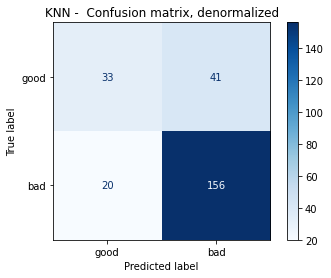

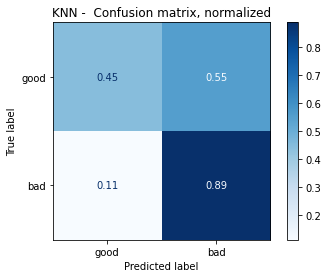

In [1467]:
method= 'KNN'
confusion_matrix(y_test, y_pred, options, method, class_names, color_map)

## LDA

In [1468]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(data,target)
score = knn.score(data,target)
scores = scores.append({'method': 'LDA', 'score': score},ignore_index=True)
print(score)
print(lda.predict_proba(data))
print(lda.explained_variance_ratio_)

0.768
[[0.07 0.93]
 [0.71 0.29]
 [0.09 0.91]
 ...
 [0.11 0.89]
 [0.36 0.64]
 [0.57 0.43]]
[1.]


In [1469]:
lda.get_params(deep=True)

{'covariance_estimator': None,
 'n_components': None,
 'priors': None,
 'shrinkage': None,
 'solver': 'svd',
 'store_covariance': False,
 'tol': 0.0001}

In [1470]:
y_pred = lda.fit(X_train, y_train).predict(X_test)


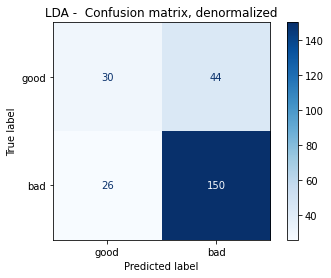

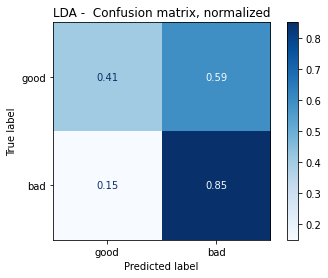

In [1471]:
method = 'LDA'
confusion_matrix(y_test, y_pred, options, method, class_names, color_map)

## QDA

In [1472]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda.fit(data,target)
score = qda.score(data,target)
scores = scores.append({'method': 'QDA', 'score': score},ignore_index=True)
print(score)
print(qda.predict_proba(data))


0.765
[[0.01 0.99]
 [0.92 0.08]
 [0.03 0.97]
 ...
 [0.02 0.98]
 [0.95 0.05]
 [0.43 0.57]]


In [1473]:
qda.get_params(deep=True)

{'priors': None, 'reg_param': 0.0, 'store_covariance': False, 'tol': 0.0001}

In [1474]:
y_pred = qda.fit(X_train, y_train).predict(X_test)

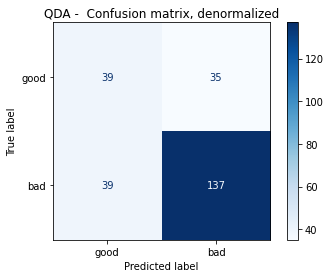

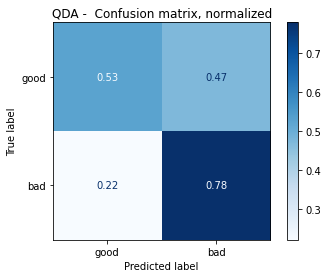

In [1475]:
method = 'QDA'
confusion_matrix(y_test, y_pred, options, method, class_names, color_map)

## SVC

In [1476]:
from sklearn.svm import SVC

parameters = { 'kernel': ('linear', 'rbf'), 'C': [1,10], 'gamma': ('scale', 'auto') }
clf = GridSearchCV(SVC(), parameters, cv=5)
clf.fit(data, target)
print(clf.best_params_)

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [1477]:
svc = SVC(**clf.best_params_)
svc.fit(data,target)
score = qda.score(data,target)
scores = scores.append({'method': 'SVC', 'score': score},ignore_index=True)
print(score)
print(svc.predict(data))

0.76
[1 0 1 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0
 1 0 1 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0
 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1
 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1
 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0
 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1

In [1478]:
svc.get_params(deep=True)

{'C': 10,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [1479]:
y_pred = svc.fit(X_train, y_train).predict(X_test)

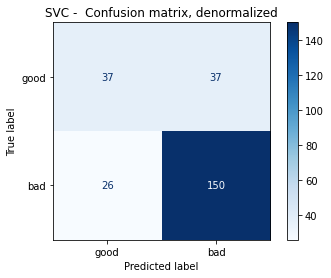

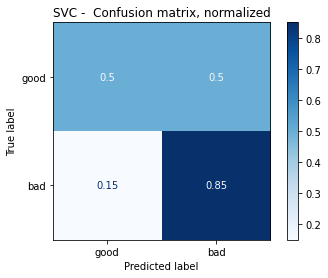

In [1480]:
method = 'SVC'
confusion_matrix(y_test, y_pred, options, method, class_names, color_map)

## MLP

In [1481]:
#Treinamento muito demorado...

#from sklearn.neural_network import MLPClassifier

# parameters = { 'solver': ('adam','lbfgs'), 'alpha': [0.0001, 0.00001], 'hidden_layer_sizes': [100,200], 'max_iter': [700,1000] }
#clf = GridSearchCV(MLPClassifier(), parameters, cv=5)
#clf.fit(data, target)
#print(clf.score(data, target))
#print(clf.best_params_)

In [1482]:
from sklearn.neural_network import MLPClassifier

# Estão sendo ignorados os parâmetros obtidos via GridSearchCV devido a demora...
#mlp = MLPClassifier(**clf.best_params_)
parameters = parameters = {'solver': 'lbfgs', 'alpha': 0.0001, 'hidden_layer_sizes': (20,20), 'max_iter': 1000}
mlp = MLPClassifier(**parameters)
mlp.fit(data, target)
score = mlp.score(data,target)
scores = scores.append({'method': 'MLP', 'score': score},ignore_index=True)
print(score)
mlp.predict(data)

1.0


array([1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [1483]:
mlp.get_params(deep=True)

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (20, 20),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 1000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

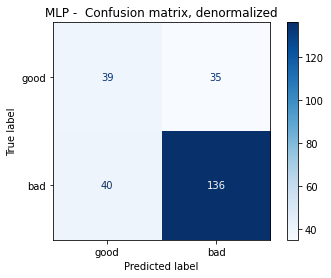

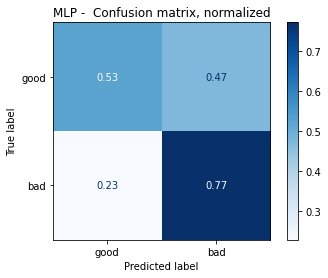

In [1484]:
y_pred = mlp.fit(X_train, y_train).predict(X_test)
method = 'MLP'
confusion_matrix(y_test, y_pred, options, method, class_names, color_map)

# Resumo de resultados

In [1485]:
import plotly.express as px

fig = px.bar(scores, x='method', y='score')
fig.show()

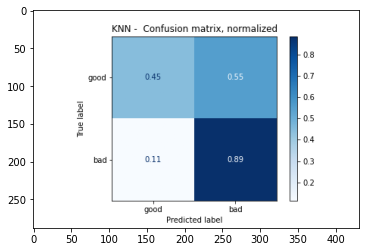

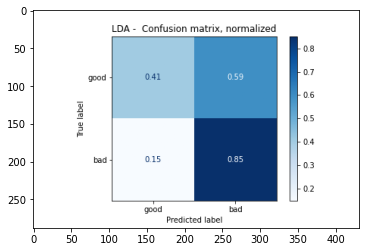

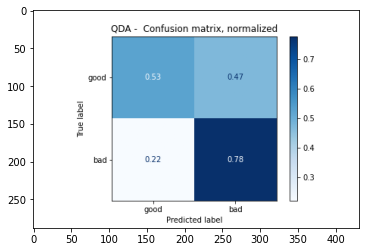

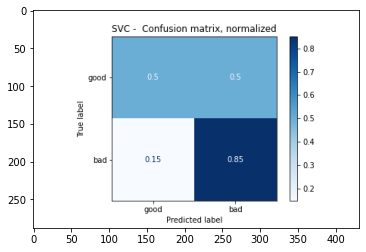

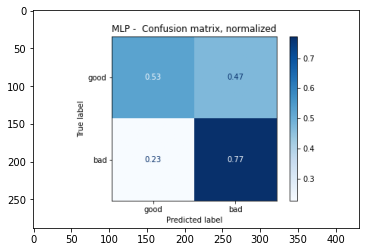

In [1486]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
methods = ['KNN', 'LDA', 'QDA', 'SVC', 'MLP']
for method in methods:
  img = mpimg.imread(method+'.png')
  plt.imshow(img)
  plt.show()